<a href="https://colab.research.google.com/github/ricy200/BachelorThesis/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to the Bachelor Thesis by Ricarda Lepsius
*Part of this Code has been generated with the use of ChatGPT-4o mini (a generative large language model): https://openai.com/index/chatgpt/*

# **Downloads**

In [ ]:
# !pip install nltk
# !pip install pyemd
# !pip install spacy
# !pip install gensim
!pip install POT
!pip install pingouin
# !python -m spacy download de_core_news_sm
!pip install kneed
!pip install accelerate
!pip install -U bitsandbytes
import transformers
import torch
import nltk
import pickle
import spacy
import ot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import statistics
import pingouin as pg
#import bitsandbytes, flash_attn
import torch
from scipy.spatial import Delaunay
from collections import Counter
from numpy import pad
from transformers import AutoTokenizer, AutoModel, pipeline, BitsAndBytesConfig
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from scipy.stats import entropy, mannwhitneyu, ttest_ind, bootstrap
from gensim.models import KeyedVectors
from sklearn.neighbors import KernelDensity
from kneed import KneeLocator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from google.colab import drive
from transformers import AutoTokenizer, AutoModelForCausalLM, LlamaForCausalLM

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlin

In [ ]:
#!pip install huggingface_hub
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Define model ID
model_id = "NousResearch/Hermes-2-Theta-Llama-3-70B"

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, local_files_only=True)
tokenizer.pad_token = tokenizer.eos_token

# Load Model in 4-bit Quantization
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True
)

# Load Model with Offloading
model = LlamaForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map = {"": 0},  # Force everything to GPU
    # max_memory=max_memory
)

model-00007-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00008-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00009-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00010-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00011-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00012-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00013-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00014-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00015-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00016-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00017-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00018-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00019-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00020-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00021-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00022-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00023-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00024-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00025-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00026-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00027-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00028-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00029-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00030-of-00030.safetensors:   0%|          | 0.00/2.10G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/169 [00:00<?, ?B/s]

**Load and Read the TXT files**

In [ ]:
# Initialize the pipeline with the loaded model
feature_pipeline = transformers.pipeline(
    "feature-extraction",
    model=model,
    tokenizer=tokenizer,
    output_hidden_states=True,
    return_tensors = "pt"
)

# Download the German stopwords
nltk.download('stopwords')
german_stopwords = set(stopwords.words('german'))

def preprocess_text(text):
    # Remove punctuation
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = text_no_punct.split()
    filtered_words = [word for word in words if word.lower() not in german_stopwords]
    # Join the words back into a single string
    return ' '.join(filtered_words)

# Read the text from the human txt file
with open('Text_Human.txt', 'r', encoding='MacRoman') as f:
    text_hum = f.read()

# Process the human text
pdf_text_hum = preprocess_text(text_hum)


# Read the text from the LLM txt file
with open('Text_LLM.txt', 'r', encoding='MacRoman') as f:
    text_llm = f.read()

# Process the LLM text
pdf_text_llm = preprocess_text(text_llm)

# Split into paragraphs for pairwise comparison later
# Split text into paragraphs
par_hum = text_hum.split("\n\n")
par_llm = text_llm.split("\n\n")

paragraphs_hum = [preprocess_text(paragraph) for paragraph in par_hum]
paragraphs_llm = [preprocess_text(paragraph) for paragraph in par_llm]

Device set to use cuda:0
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Word Embedding**

**Word Embedding (with pipeline)**

In [ ]:
# Word embedding for the whole text

nltk.download('punkt_tab')
# Human Data
# Use NLTK to split the text into words
def split_into_words(text):
    words = nltk.word_tokenize(text)
    return words

# Split the text into individual words
wordsfromfile_hum = split_into_words(pdf_text_hum)

# Obtain word embeddings
word_embeddings_hum = feature_pipeline(
    wordsfromfile_hum,
    pad_to_max_length=True,
    truncation=True
)

# LLM Data
# Split the text into individual words
wordsfromfile_llm = split_into_words(pdf_text_llm)

# Obtain word embeddings
word_embeddings_llm = feature_pipeline(
    wordsfromfile_llm,
    pad_to_max_length=True,
    truncation=True
)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Save word_embeddings_hum to a file
with open('word_embeddings_hum.pkl', 'wb') as f:
    pickle.dump(word_embeddings_hum, f)

# Save word_embeddings_hum to a file
with open('word_embeddings_llm.pkl', 'wb') as f:
    pickle.dump(word_embeddings_llm, f)

In [ ]:
# Display word embeddings (can switch btw. hum/llm data)
print("Word embeddings:")
for i, (word, embedding) in enumerate(zip(wordsfromfile_hum, word_embeddings_hum)):
    if i >= 5:  # Limit to the first 5 words and embeddings
          break
    print(f"Word {i+1}: {word}")
    print(f"Embedding: {embedding}")
    print("\n")

print(type(word_embeddings_hum))
print(len(word_embeddings_hum))  # Number of words or tokens
print(len(word_embeddings_hum[0]))  # Number of tokens for the first word
print(len(word_embeddings_hum[0][0]))  # Embedding size for first token of first word
print(len(word_embeddings_hum[0][0][0])) # size of hidden state vector

Word embeddings:
Word 1: SchwarzWeißFotografie
Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         [ 4.8516,  2.0293,  4.1719,  ..., -2.5176, -2.5176, -2.5176],
         [ 3.1758,  2.9570,  1.8975,  ..., -5.5586, -5.5586, -5.5586],
         ...,
         [ 5.7891,  2.4570,  5.2148,  ..., -2.0527, -2.0527, -2.0527],
         [ 6.0234,  3.2754,  5.3438,  ..., -2.4082, -2.4082, -2.4102],
         [ 6.5273,  3.3672,  4.1758,  ..., -4.9805, -4.9805, -4.9805]]],
       dtype=torch.float16)


Word 2: älteren
Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         [ 4.1758,  5.9414,  4.7773,  ..., -2.2168, -2.2168, -2.2168],
         [ 3.9805,  6.4336,  1.7734,  ..., -3.4805, -3.4805, -3.4805],
         [ 4.2891,  7.4297,  1.6504,  ..., -4.6562, -4.6602, -4.6562]]],
       dtype=torch.float16)


Word 3: Mannes
Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         [ 5.0391,  2.6094,  4

In [ ]:
# Word Embedding for each Paragraph

# Tokenize each paragraph into words
wordsfrompar_hum = [nltk.word_tokenize(paragraph) for paragraph in paragraphs_hum]
wordsfrompar_llm = [nltk.word_tokenize(paragraph) for paragraph in paragraphs_llm]

# Compute cumulative word counts to slice embeddings
word_counts_hum = np.cumsum([len(words) for words in wordsfrompar_hum])
word_counts_llm = np.cumsum([len(words) for words in wordsfrompar_llm])

# Add a zero at the beginning for easier slicing
word_counts_hum = np.insert(word_counts_hum, 0, 0)
word_counts_llm = np.insert(word_counts_llm, 0, 0)

# Slice embeddings into paragraphs
wordpar_embeddings_hum = [
    word_embeddings_hum[word_counts_hum[i]:word_counts_hum[i+1]]
    for i in range(len(wordsfrompar_hum))
]

wordpar_embeddings_llm = [
    word_embeddings_llm[word_counts_llm[i]:word_counts_llm[i+1]]
    for i in range(len(wordsfrompar_llm))
]

In [ ]:
# Display word embeddings (can switch btw. hum/llm data)
print("Word embeddings:")
for i, (word, embedding) in enumerate(zip(wordsfrompar_hum, wordpar_embeddings_hum)):
    if i >= 5:  # Limit to the first 5 paragraphs
          break
    print(f"Paragraph {i+1}:")
    for j, (w, emb) in enumerate(zip(word, embedding)):
      if j >= 5:  # Limit to the first 5 words and embeddings
          break
      print(f"  Word {j+1}: {w}")
      print(f"  Embedding: {emb}")
    print("\n")

print(type(wordpar_embeddings_hum))
print(len(wordpar_embeddings_hum))  # Number of paragraphs
print(len(wordpar_embeddings_hum[0]))  # Number of words in first paragraph
print(len(wordpar_embeddings_hum[0][0]))  # Number of tokens for first word
print(len(wordpar_embeddings_hum[0][0][0])) # Embedding for first token of first word
print(len(wordpar_embeddings_hum[0][0][0][0])) # dimension

Word embeddings:
Paragraph 1:
  Word 1: SchwarzWeißFotografie
  Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         [ 4.8516,  2.0293,  4.1719,  ..., -2.5176, -2.5176, -2.5176],
         [ 3.1758,  2.9570,  1.8975,  ..., -5.5586, -5.5586, -5.5586],
         ...,
         [ 5.7891,  2.4570,  5.2148,  ..., -2.0527, -2.0527, -2.0527],
         [ 6.0234,  3.2754,  5.3438,  ..., -2.4082, -2.4082, -2.4102],
         [ 6.5273,  3.3672,  4.1758,  ..., -4.9805, -4.9805, -4.9805]]],
       dtype=torch.float16)
  Word 2: älteren
  Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         [ 4.1758,  5.9414,  4.7773,  ..., -2.2168, -2.2168, -2.2168],
         [ 3.9805,  6.4336,  1.7734,  ..., -3.4805, -3.4805, -3.4805],
         [ 4.2891,  7.4297,  1.6504,  ..., -4.6562, -4.6602, -4.6562]]],
       dtype=torch.float16)
  Word 3: Mannes
  Embedding: tensor([[[ 6.9609,  9.1875, 13.0625,  ..., -2.1602, -2.1582, -2.1582],
         

# **Pairwise Comparisons**

**Cosine Similarity**

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 1)

# Cosine Similarity Using Mean Pooling (Aggregation)

# Function for cutting out the first inner list, since it is the same for each
# embedding
def cut_first_inner_list(embedding):
  emb = []
  for j in range(len(embedding)): # for each paragraph
    par_embeddings = []
    for i in range(len(embedding[j])): # for each word
      token_embeddings = np.array(embedding[j][i])[0][1:]  # Exclude first layer
      par_embeddings.append(token_embeddings)  # Store as flexible list of arrays
    emb.append(par_embeddings)
  return emb

# Function for aggregating on a paragraph level: creating a list with one single
# array for each paragraph and generating the mean over all words
def aggregate_per_par(embedding):
  avg_embeddings = [np.mean(np.vstack(par), axis=0) for par in embedding]
  std_embeddings = [np.std(np.vstack(par), axis=0) for par in embedding]
  return avg_embeddings, std_embeddings


# setting emb_hum and emb_llm to their respective embedding by calling the function
emb_hum = cut_first_inner_list(wordpar_embeddings_hum)
emb_llm = cut_first_inner_list(wordpar_embeddings_llm)

# aggregating llm and hum embeddings on paragraph level
emb_hum_avg, emb_hum_std = aggregate_per_par(emb_hum)
emb_llm_avg, emb_llm_std = aggregate_per_par(emb_llm)

# Compute cosine similarity for paragraph-level embeddings
average_similarities = [cosine_similarity(h[np.newaxis, :], l[np.newaxis, :])[0, 0]
                        for h, l in zip(emb_hum_avg, emb_llm_avg)]



for i in range(len(wordpar_embeddings_hum)): # for each paragraph
  print(f"Average Cosine Similarity of paragraph {i+1}:", average_similarities[i])

Average Cosine Similarity of paragraph 1: 0.9930347977064808
Average Cosine Similarity of paragraph 2: 0.989446735166702
Average Cosine Similarity of paragraph 3: 0.9931119580957621
Average Cosine Similarity of paragraph 4: 0.9860499944118138
Average Cosine Similarity of paragraph 5: 0.9944387343693555
Average Cosine Similarity of paragraph 6: 0.9974150099197087
Average Cosine Similarity of paragraph 7: 0.9946464519582088
Average Cosine Similarity of paragraph 8: 0.9889801347532252
Average Cosine Similarity of paragraph 9: 0.9878144186490175
Average Cosine Similarity of paragraph 10: 0.9884332056289553
Average Cosine Similarity of paragraph 11: 0.9978548831585883
Average Cosine Similarity of paragraph 12: 0.9953151880976057
Average Cosine Similarity of paragraph 13: 0.9880319091294846
Average Cosine Similarity of paragraph 14: 0.9941867141452257
Average Cosine Similarity of paragraph 15: 0.9946089023301424
Average Cosine Similarity of paragraph 16: 0.9949656992001186
Average Cosine Sim

In [ ]:
# This just shows that each first list of each word is basically the same
def extract_first_inner_list(embedding):
    emb = []
    for j in range(len(embedding)):  # for each paragraph
        par_embeddings = []
        for i in range(len(embedding[j])):  # for each word
            token_embeddings = np.array(embedding[j][i])[0][:1]  # Extract only the first layer
            par_embeddings.append(token_embeddings)
        emb.append(par_embeddings)
    return emb

def compute_cosine_similarities(embedding):
    extracted_embeddings = extract_first_inner_list(embedding)
    similarities = []
    for j in range(len(extracted_embeddings)):  # for each paragraph
        par_similarities = []
        for i in range(len(extracted_embeddings[j]) - 1):  # Compute similarity between consecutive words
            word_embedding_1 = extracted_embeddings[j][i].reshape(1, -1)
            word_embedding_2 = extracted_embeddings[j][i + 1].reshape(1, -1)
            similarity = cosine_similarity(word_embedding_1, word_embedding_2)[0][0]
            par_similarities.append(similarity)
        similarities.append(par_similarities)
    return similarities

x = compute_cosine_similarities(wordpar_embeddings_hum)
y = compute_cosine_similarities(wordpar_embeddings_llm)

print(x)
print(y)

[[1.0, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999999065397644, 1.0], [0.9999999065397644, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644, 0.9999999065397644, 1.0, 0.9999999065397644, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999999065397644, 0.9999999065397644], [1.0, 0.999999906539

In [ ]:
# Bootstrapping the above
# Function for randomly picking two paragraphs n-times
def random_indices(embedding, iteration):
  random_indices = [
        tuple(np.random.choice(len(embedding), size=2, replace=True))
        for _ in range(iteration)
    ]
  return random_indices

# pick random pairs
random_idx_pairs_cos = random_indices(emb_hum_avg, 1000)

average_similarities_boot = []
for idx1, idx2 in random_idx_pairs_cos:
    # Compute cosine similarity for paragraph-level embeddings
    similarities = [cosine_similarity(emb_hum_avg[idx1][np.newaxis, :], emb_llm_avg[idx1][np.newaxis, :])[0, 0]]
    average_similarities_boot.append(similarities)
mean_cosine_sim = np.mean(average_similarities)
print("Mean Cosine Similarity:", mean_cosine_sim)

Mean Cosine Similarity: 0.9930384155447994


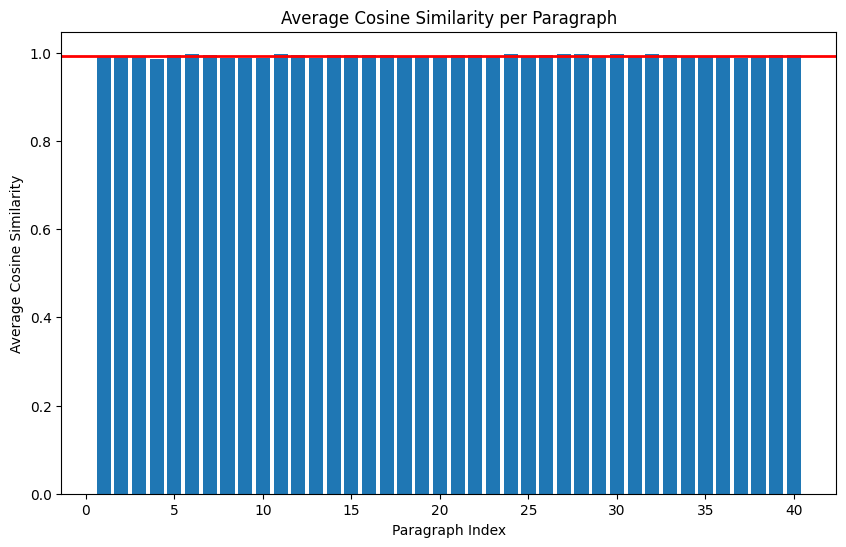

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 7)

# Barplot for Cosine Similarity Values
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(average_similarities)+1), average_similarities)
plt.axhline(y=mean_cosine_sim, color='red', linestyle='-', linewidth=2, label='Mean')
plt.xlabel("Paragraph Index")
plt.ylabel("Average Cosine Similarity")
plt.title("Average Cosine Similarity per Paragraph")
plt.savefig('barplot_cosine_similarity.png', dpi = 500, bbox_inches = 'tight')
plt.show()

**Word Mover's Distance**

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 2)

# Function for aggregating on a word level: creating np array by aggregating the
# token embedding for each word and taking the mean
def aggregate_word_embeddings(paragraph):
    aggregated = []
    for word in paragraph:
      word_embedding= np.mean(np.vstack(word),axis = 0)
      aggregated.append(word_embedding)
    return np.array(aggregated)

# Function for transforming embeddings so that gensim can work with them and
# merging the two embedding spaces so that tokens from hum and llm exist in KeyedVector
def merge_keyedvectors(embeddings1, embeddings2, word_ids1, word_ids2):
    kv = KeyedVectors(vector_size=embeddings1.shape[1])
    all_embeddings = np.concatenate((embeddings1, embeddings2), axis=0)
    all_word_ids = [str(word_ids1[i]) for i in range(len(word_ids1))] + [str(word_ids2[i]) for i in range(len(word_ids2))]
    kv.add_vectors(all_word_ids, all_embeddings)
    return kv

# agggregate the embeddings (w/o first inner list) of paragraphs on word level
emb_hum_wordavg = [aggregate_word_embeddings(emb_hum[i]) for i in range(len(emb_hum))]
emb_llm_wordavg = [aggregate_word_embeddings(emb_llm[i])for i in range(len(emb_llm))]

# Compute WMD pairwise for all paragraphs
wmd_perpar = []
for j in range(len(wordpar_embeddings_hum)): # for each paragraph
  # Compute distance matrix
  combined_kv = merge_keyedvectors(emb_hum_wordavg[j], emb_llm_wordavg[j], wordsfrompar_hum[j], wordsfrompar_llm[j])
  dist = combined_kv.wmdistance(wordsfrompar_hum[j], wordsfrompar_llm[j])
  wmd_perpar.append(dist)

for i in range(len(wordpar_embeddings_hum)): # for each paragraph
  print(f"Average Word Movers Distance of paragraph {i+1}:", wmd_perpar[i])

Average Word Movers Distance of paragraph 1: 0.38936693884004864
Average Word Movers Distance of paragraph 2: 0.516452648595111
Average Word Movers Distance of paragraph 3: 0.3858200198906026
Average Word Movers Distance of paragraph 4: 0.398549009718528
Average Word Movers Distance of paragraph 5: 0.43959327102967666
Average Word Movers Distance of paragraph 6: 0.31457147345911574
Average Word Movers Distance of paragraph 7: 0.3355426489289767
Average Word Movers Distance of paragraph 8: 0.48285177938953466
Average Word Movers Distance of paragraph 9: 0.4687825032698786
Average Word Movers Distance of paragraph 10: 0.4348026853067272
Average Word Movers Distance of paragraph 11: 0.33962257502246745
Average Word Movers Distance of paragraph 12: 0.3474567784726687
Average Word Movers Distance of paragraph 13: 0.41492842917945383
Average Word Movers Distance of paragraph 14: 0.4161796686231946
Average Word Movers Distance of paragraph 15: 0.36421274801603654
Average Word Movers Distance 

In [ ]:
# Bootstrapping the above

# pick random pairs
random_idx_pairs_wmd = random_indices(emb_llm_wordavg, 1000)

wmd_perpar_boot = []
for idx1, idx2 in random_idx_pairs_wmd:
    # Compute wmd for paragraph-level embeddings
    combined_kv = merge_keyedvectors(emb_hum_wordavg[idx1], emb_llm_wordavg[idx1], wordsfrompar_hum[idx1], wordsfrompar_llm[idx1])
    dist = combined_kv.wmdistance(wordsfrompar_hum[idx1], wordsfrompar_llm[idx1])
    wmd_perpar_boot.append(dist)

mean_wmd_perpar = np.mean(wmd_perpar_boot)
print("Mean Word Movers Distance:", mean_wmd_perpar)

Mean Word Movers Distance: 0.40113362518700424


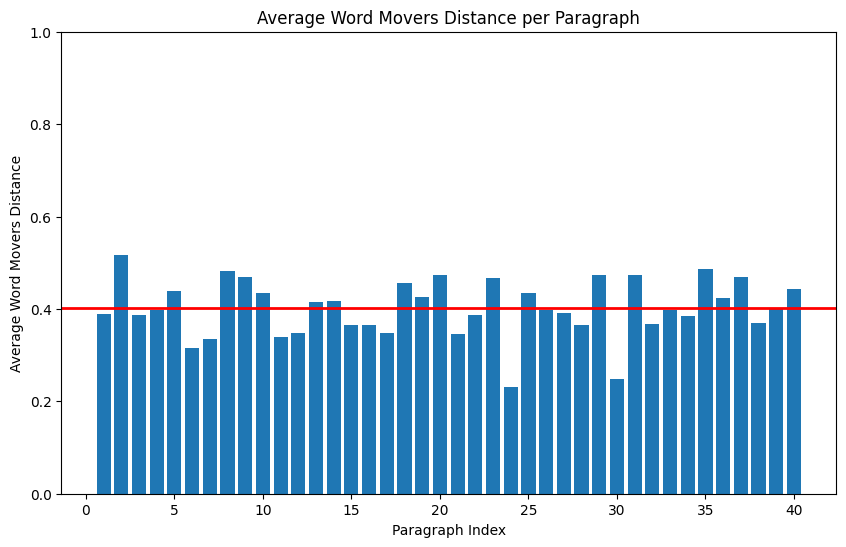

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 7)

# Barplot for WMD Values
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(wmd_perpar)+1), wmd_perpar)
plt.axhline(y=mean_wmd_perpar, color='red', linestyle='-', linewidth=2, label='Mean')
plt.xlabel("Paragraph Index")
plt.ylabel("Average Word Movers Distance")
plt.ylim(0,1)
plt.title("Average Word Movers Distance per Paragraph")
plt.savefig('barplot_wmd.png', dpi = 500, bbox_inches = 'tight')
plt.show()

# Statistical Tests

***Cosine Similarity***

*Stylistic Difference*

In [ ]:
# Generate 1000 random index pairs
random_idx_pairs_hum = random_indices(emb_hum_avg, 10000)
random_idx_pairs_llm = random_indices(emb_llm_avg, 10000)

# Human cosine similarites
all_cosine_similarities_hum = [
    cosine_similarity(
        emb_hum_avg[idx1][np.newaxis, :],
        emb_hum_avg[idx2][np.newaxis, :]
    )[0, 0]
    for idx1, idx2 in random_idx_pairs_hum
]
# LLM cosine similarities
all_cosine_similarities_llm = [
    cosine_similarity(
        emb_llm_avg[idx1][np.newaxis, :],
        emb_llm_avg[idx2][np.newaxis, :]
    )[0, 0]
    for idx1, idx2 in random_idx_pairs_llm
]

# Calculate confidence intervals
ci_hum_lower, ci_hum_upper = np.percentile(all_cosine_similarities_hum, [2.5, 97.5])
ci_llm_lower, ci_llm_upper = np.percentile(all_cosine_similarities_llm, [2.5, 97.5])

# Check whether the original Cosine value lies within the Confidence Interval
for i in range(len(average_similarities)):
    if ci_hum_lower <= average_similarities[i] <= ci_hum_upper:
      print(f"The cosine similarity of paragraph {i+1} lies within the Confidence Intervals of the Human Data.")
    else:
      print(f"The cosine similarity of paragraph {i+1} does not lie within the Confidence Intervals of the Human Data.")
      print(average_similarities[i])
    if ci_llm_lower <= average_similarities[i] <= ci_llm_upper:
      print(f"The cosine similarity of paragraph {i+1} lies within the Confidence Intervals of the LLM Data.")
    else:
      print(f"The cosine similarity of paragraph {i+1} does not lie within the Confidence Intervals of the LLM Data.")
      print(average_similarities[i])
if ci_hum_lower <= mean_cosine_sim <= ci_hum_upper:
  print(f"The mean cosine similarity lies within the Confidence Intervals of the Human Data.")
else:
  print(f"The mean cosine similarity does not lie within the Confidence Intervals of the Human Data.")
if ci_llm_lower <= mean_cosine_sim <= ci_llm_upper:
  print(f"The mean cosine similarity lies within the Confidence Intervals of the LLM Data.")
else:
  print(f"The mean cosine similarity does not lie within the Confidence Intervals of the LLM Data.")


The cosine similarity of paragraph 1 lies within the Confidence Intervals of the Human Data.
The cosine similarity of paragraph 1 lies within the Confidence Intervals of the LLM Data.
The cosine similarity of paragraph 2 lies within the Confidence Intervals of the Human Data.
The cosine similarity of paragraph 2 lies within the Confidence Intervals of the LLM Data.
The cosine similarity of paragraph 3 lies within the Confidence Intervals of the Human Data.
The cosine similarity of paragraph 3 lies within the Confidence Intervals of the LLM Data.
The cosine similarity of paragraph 4 lies within the Confidence Intervals of the Human Data.
The cosine similarity of paragraph 4 lies within the Confidence Intervals of the LLM Data.
The cosine similarity of paragraph 5 lies within the Confidence Intervals of the Human Data.
The cosine similarity of paragraph 5 lies within the Confidence Intervals of the LLM Data.
The cosine similarity of paragraph 6 lies within the Confidence Intervals of the

In [ ]:
# Perform Bayesian t-test against the interval [0.9,1]
bf_result_cos = pg.ttest(x=average_similarities, y=[0.9, 1]) #not paired measurement because cosine similarities are not paired to value 1

# Output Bayes Factor (BF10)
print("Tested against [0.9, 1]:")
print(f"Bayes Factor (BF10): {bf_result_cos['BF10'].values[0]}")

# Confidence interval to indicate plausible range for true mean of cosine similarity values--> if 1 is in this interval: do not reject H0
print(f"Confidence Interval: {bf_result_cos['CI95%'].values[0]}")

# Interpretation
bf10cos = float(bf_result_cos['BF10'].values[0])
if bf10cos > 3:
    print("Evidence for the alternative hypothesis (cosine similarities < 1).")
elif bf10cos < 1/3:
    print("Evidence for the null hypothesis (cosine similarities ≈ 1).")
else:
    print("Inconclusive evidence.")

#################################################################################
# Perform Bayesian t-test against the value 1
bf_result_cos1 = pg.ttest(x=average_similarities, y = 1)

# Output Bayes Factor
print("Tested against 1:")
print(f"Bayes Factor: {bf_result_cos1['BF10'].values[0]}")
# output confidence interval for true mean
print(f"Confidence Interval: {bf_result_cos1['CI95%'].values[0]}")
# Interpretation
bf10cos1 = float(bf_result_cos1['BF10'].values[0])
if bf10cos1 > 3:
    print("Evidence for the alternative hypothesis (cosine similarities < 1).")
elif bf10cos1 < 1/3:
    print("Evidence for the null hypothesis (cosine similarities ≈ 1).")
else:
    print("Inconclusive evidence.")

Tested against [0.9, 1]:
Bayes Factor (BF10): 0.646
Confidence Interval: [-0.59  0.68]
Inconclusive evidence.
Tested against 1:
Bayes Factor: 3.28e+13
Confidence Interval: [0.99 0.99]
Evidence for the alternative hypothesis (cosine similarities < 1).


***Word Mover's Distance***

In [ ]:
# Generate 1000 random index pairs
random_idx_pairs_hum_wmd = random_indices(emb_hum_wordavg, 10000)
random_idx_pairs_llm_wmd = random_indices(emb_llm_wordavg, 10000)

# to store the WMD values
all_wmd_hum = []
all_wmd_llm = []

# Calculate WMD between random pars in hum embedding
for idx1, idx2 in random_idx_pairs_hum_wmd:
    kv_stat = merge_keyedvectors(emb_hum_wordavg[idx1], emb_hum_wordavg[idx2], wordsfrompar_hum[idx1], wordsfrompar_hum[idx2])
    dist = kv_stat.wmdistance(wordsfrompar_hum[idx1], wordsfrompar_hum[idx2])
    all_wmd_hum.append(dist)

# Calculate WMD between random  pars in llm embedding
for idx1, idx2 in random_idx_pairs_llm_wmd:
    kv_stat = merge_keyedvectors(emb_llm_wordavg[idx1], emb_llm_wordavg[idx2], wordsfrompar_llm[idx1], wordsfrompar_llm[idx2])
    dist = kv_stat.wmdistance(wordsfrompar_llm[idx1], wordsfrompar_llm[idx2])
    all_wmd_llm.append(dist)

# Calculate confidence intervals
ci_hum_lower_wmd, ci_hum_upper_wmd = np.percentile(all_wmd_hum, [2.5, 97.5])
ci_llm_lower_wmd, ci_llm_upper_wmd = np.percentile(all_wmd_llm, [2.5, 97.5])

# Check whether the original Cosine value lies within the Confidence Interval
for i in range(len(wmd_perpar)):
    if ci_hum_lower_wmd <= wmd_perpar[i] <= ci_hum_upper_wmd:
      print(f"The wmd of paragraph {i+1} lies within the Confidence Intervals of the Human Data.")
    else:
      print(f"The wmd of paragraph {i+1} does not lie within the Confidence Intervals of the Human Data.")
      print(wmd_perpar[i])
    if ci_llm_lower_wmd <= wmd_perpar[i] <= ci_llm_upper_wmd:
      print(f"The wmd of paragraph {i+1} lies within the Confidence Intervals of the LLM Data.")
    else:
      print(f"The wmd of paragraph {i+1} does not lie within the Confidence Intervals of the LLM Data.")
      print(wmd_perpar[i])
if ci_llm_lower_wmd <= mean_wmd_perpar <= ci_llm_upper_wmd:
      print(f"The mean wmd lies within the Confidence Intervals of the LLM Data.")
else:
      print(f"The mean wmd does not lie within the Confidence Intervals of the LLM Data.")
if ci_hum_lower_wmd <= mean_wmd_perpar <= ci_hum_upper_wmd:
      print(f"The mean wmd lies within the Confidence Intervals of the Human Data.")
else:
      print(f"The mean wmd does not lie within the Confidence Intervals of the Human Data.")


KeyboardInterrupt: 

In [ ]:
# Generate 1000 random pairs to create a baseline: random pairing of LLM and Hum
random_idx_pairs = random_indices(emb_hum_wordavg, 1000)

# to store WMD values between random paragraph pairs
random_wmd = []

# Calculate WMD between random pairs of LLM and Hum
for idx1, idx2 in random_idx_pairs:
    kv_stat = merge_keyedvectors(emb_hum_wordavg[idx1], emb_llm_wordavg[idx2], wordsfrompar_hum[idx1], wordsfrompar_llm[idx2])
    dist = kv_stat.wmdistance(wordsfrompar_hum[idx1], wordsfrompar_llm[idx2])
    random_wmd.append(dist)

# Calculate bayes t-test (against mean of random_wmd)
bf_result_wmd = pg.ttest(x=wmd_perpar, y=np.mean(random_wmd))

# Bayes Factor BF10
print(f"Bayes Factor (BF10): {bf_result_wmd['BF10'].values[0]}")

# Confidence Interval to indicate plausible range of true mean of original wmd values
print(f"Confidence Interval: {bf_result_wmd['CI95%'].values[0]}")

# Interpretation
bf10wmd = float(bf_result_wmd['BF10'].values[0])
if bf10wmd > 3:
    print("Evidence for the alternative hypothesis (measured wmd ≈ 0).")
elif bf10wmd < 1/3:
    print("Evidence for the null hypothesis (measured wmd > 0).")
else:
    print("Inconclusive evidence.")

Bayes Factor (BF10): 5.904e+04
Confidence Interval: [0.38 0.42]
Evidence for the alternative hypothesis (measured wmd ≈ 0).


*Visualization*

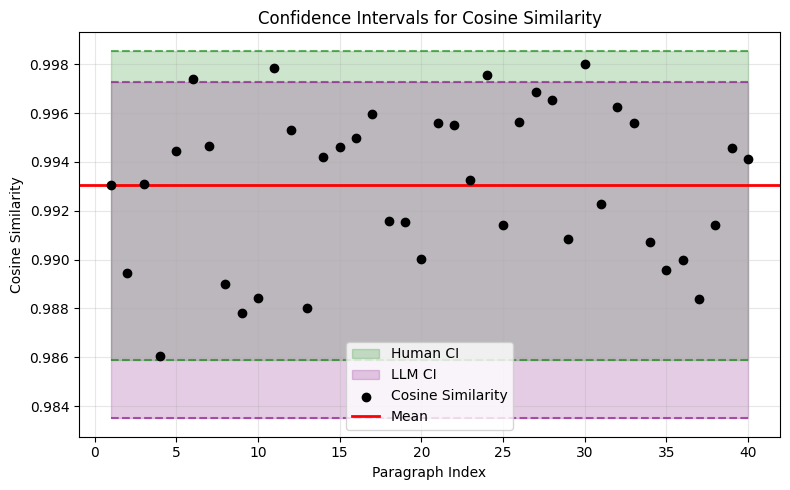

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 8)

# Function for Plotting CI
def plot_confidence_interval(values, hum_lower, hum_upper, llm_lower, llm_upper, labeled, mean_value, locat):
    # plotting
    plt.figure(figsize=(8, 5))
    # For X-Axis
    paragraph_indices = np.arange(1, len(values)+1)  # Paragraph indices

    # Plot Human CI
    plt.fill_between(paragraph_indices, hum_lower, hum_upper, color='green', alpha=0.2, label='Human CI')
    plt.plot(paragraph_indices, [hum_lower] * len(paragraph_indices), color='green', linestyle='--', alpha=0.6)
    plt.plot(paragraph_indices, [hum_upper] * len(paragraph_indices), color='green', linestyle='--', alpha=0.6)

    # Plot LLM CI
    plt.fill_between(paragraph_indices, llm_lower, llm_upper, color='purple', alpha=0.2, label='LLM CI')
    plt.plot(paragraph_indices, [llm_lower] * len(paragraph_indices), color='purple', linestyle='--', alpha=0.6)
    plt.plot(paragraph_indices, [llm_upper] * len(paragraph_indices), color='purple', linestyle='--', alpha=0.6)

    # Plot original values
    plt.scatter(paragraph_indices, values, color='black', label=labeled, zorder=3)

    plt.axhline(y=mean_value, color='red', linestyle='-', linewidth=2, label='Mean')

    # Labels and Legend
    plt.xlabel('Paragraph Index')
    plt.ylabel(labeled)
    plt.title('Confidence Intervals for ' + labeled)
    plt.legend(loc = locat)
    plt.grid(alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.savefig('confidence_interval_'+ labeled +'.png',  dpi = 500, bbox_inches = 'tight')
    plt.show()


# Plot Cosine Similarity
plot_confidence_interval(average_similarities,ci_hum_lower,ci_hum_upper,ci_llm_lower,ci_llm_upper,'Cosine Similarity',mean_cosine_sim, 'lower center')

# Plot WMD
#plot_confidence_interval(wmd_perpar,ci_hum_lower_wmd, ci_hum_upper_wmd, ci_llm_lower_wmd,ci_llm_upper_wmd,'Word Movers Distance', mean_wmd_perpar, 'lower left')

# **Dimensionality Reduction and Visualization**

**Reducing Dimensionality, Creating nparray and Calculating Explained Variance**

In [ ]:
# Function to remove first inner list of each word
def remove_first_inner_list(embedding):
    emb = []
    for i in range(len(embedding)):  # for each word
        token_embeddings = np.array(embedding[i])[0][1:]  # Exclude first layer
        emb.append(token_embeddings)  # Store as flexible list of arrays
    return emb

# Function to reduce dimensionality so that KDE can work with it, and calculating
# explained variance per principal component
def reduce_dimensionality(embeddings,n_components):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    return reduced_embeddings, explained_variance_ratio, cum_explained_variance_ratio

# Aggregate LLM and Human Embeddings on word level
agg_word_embeddings_hum = aggregate_word_embeddings(remove_first_inner_list(word_embeddings_hum))
agg_word_embeddings_llm = aggregate_word_embeddings(remove_first_inner_list(word_embeddings_llm))

**Graph of Embeddings for Visualization**

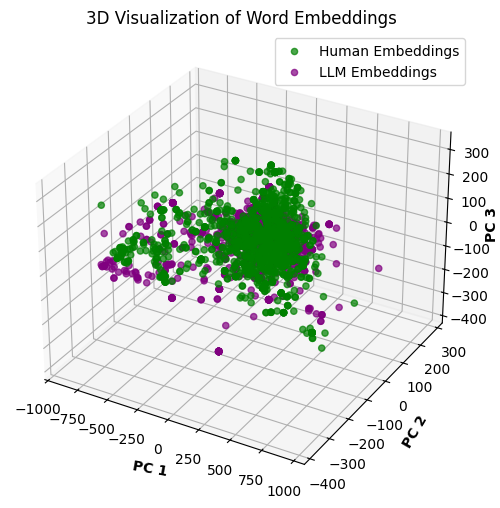

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 9)

# Create 3D Plot using PCA

# set variable for aggregated and reduced(3PC) word embeddings for visualization
aggandred_word_embeddings_hum_visual = reduce_dimensionality(agg_word_embeddings_hum, 3)[0]
aggandred_word_embeddings_llm_visual = reduce_dimensionality(agg_word_embeddings_llm, 3)[0]

# Extract the 3D coordinates from the reduced embeddings
hum_x, hum_y, hum_z = aggandred_word_embeddings_hum_visual[:, 0], aggandred_word_embeddings_hum_visual[:, 1], aggandred_word_embeddings_hum_visual[:, 2]
llm_x, llm_y, llm_z = aggandred_word_embeddings_llm_visual[:, 0], aggandred_word_embeddings_llm_visual[:, 1], aggandred_word_embeddings_llm_visual[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot human embeddings
ax.scatter(hum_x, hum_y, hum_z, c='green', label='Human Embeddings', alpha=0.7)

# Plot LLM embeddings
ax.scatter(llm_x, llm_y, llm_z, c='purple', label='LLM Embeddings', alpha=0.7)

# Set plot labels and title
ax.set_xlabel('PC 1', labelpad = 3, rotation= 350, fontweight = 'bold')
ax.set_ylabel('PC 2', labelpad = 5, rotation = 60, fontweight = 'bold')
ax.set_zlabel('PC 3', labelpad = -1, rotation = 90, fontweight = 'bold')
ax.set_title('3D Visualization of Word Embeddings')
# add legend
plt.legend()
# Show the plot
plt.savefig('3d_plot.png', dpi = 500, bbox_inches = 'tight')
plt.show()

The elbow point of the Human Embedding is at Principal Component 4.
The elbow point of the LLM Embedding is at Principal Component 4.
55.70437877960467 % of the variance is explained by 4 components in Human Data.
52.75566252641131 % of the variance is explained by 4 components in LLM Data.
The elbow point used for both embeddings is 4.
PC 4 explains 55.7 % of the Human Data.
PC 4 explains 52.76 % of the LLM Data.


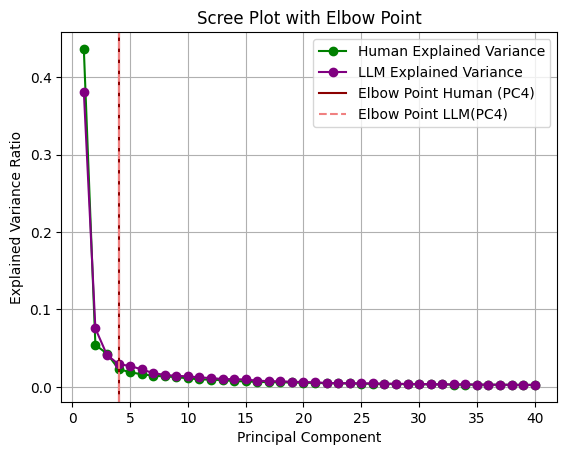

In [ ]:
# This was generated with the help of ChatGPT (Promt Number 3 and 4)

# Scree Plot for Convex Hull
# to identify amount of components that explain most variance

# Function for finding the elbow point
def find_elbow_point(explained_var):
    knee_locator = KneeLocator(
        range(1, len(explained_var) + 1),
        explained_var,
        curve="convex",
        direction="decreasing"
    )
    return knee_locator.knee

# Set Variable for Explained variance and cumulative variance
explained_var_hum = reduce_dimensionality(agg_word_embeddings_hum, 40)[1]
explained_var_llm = reduce_dimensionality(agg_word_embeddings_llm, 40)[1]
cum_explained_var_hum = reduce_dimensionality(agg_word_embeddings_hum, 40)[2]
cum_explained_var_llm = reduce_dimensionality(agg_word_embeddings_llm, 40)[2]

# for Human Embedding
elbow_point_hum = find_elbow_point(explained_var_hum)
# for LLM Embedding
elbow_point_llm = find_elbow_point(explained_var_llm)

# for all
elbow_point = max(elbow_point_hum, elbow_point_llm)
cum_point_hum = cum_explained_var_hum[elbow_point - 1]
cum_point_llm = cum_explained_var_llm[elbow_point - 1]

# Print the Elbow Point
print(f"The elbow point of the Human Embedding is at Principal Component {elbow_point_hum}.")
print(f"The elbow point of the LLM Embedding is at Principal Component {elbow_point_llm}.")
print(f"{(cum_explained_var_hum[elbow_point_hum -1])*100} % of the variance is explained by {elbow_point_hum} components in Human Data.")
print(f"{(cum_explained_var_llm[elbow_point_llm -1])*100} % of the variance is explained by {elbow_point_llm} components in LLM Data.")
print(f"The elbow point used for both embeddings is {elbow_point}.")
print(f"PC {elbow_point} explains {round(cum_point_hum*100,2)} % of the Human Data.")
print(f"PC {elbow_point} explains {round(cum_point_llm*100,2)} % of the LLM Data.")


# Print Scree Plot with the Elbow Point
plt.plot(
    range(1, len(explained_var_hum) + 1),
    explained_var_hum,
    'o-',
    label='Human Explained Variance',
    color = 'green')
plt.plot(
    range(1, len(explained_var_llm) + 1),
    explained_var_llm,
    'o-',
    label='LLM Explained Variance',
    color = 'purple')
plt.axvline(x=elbow_point_hum, color='darkred', linestyle='-', label=f'Elbow Point Human (PC{elbow_point_hum})')
plt.axvline(x=elbow_point_llm, color='lightcoral', linestyle='--', label=f'Elbow Point LLM(PC{elbow_point_llm})')
plt.title('Scree Plot with Elbow Point')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid()
plt.savefig('scree_plot.png', dpi = 500, bbox_inches = 'tight')
plt.show()

# **Whole-text Comparisons**

**Convex Hull**

In [ ]:
# Convex Hull to measure how much of the embedding space is covered by the embeddings

# Function for calculating convex hull
def calculate_convex_hull(embeddings):
    # Compute the convex hull
    hull = ConvexHull(embeddings)
    return hull.volume, hull.area, len(hull.vertices), hull

# set variable for aggregated and reduced word embeddings
aggandred_word_embeddings_hum = reduce_dimensionality(agg_word_embeddings_hum, elbow_point)[0]
aggandred_word_embeddings_llm = reduce_dimensionality(agg_word_embeddings_llm, elbow_point)[0]

# calculate convex hull metrics with aggregated and reduced embeddings (elbow_point)
human_metrics = calculate_convex_hull(aggandred_word_embeddings_hum)[0:3]
llm_metrics = calculate_convex_hull(aggandred_word_embeddings_llm)[0:3]
# calculate hull with 3 Principal Components (because it is only used for visualization)
hull_hum = calculate_convex_hull(aggandred_word_embeddings_hum_visual)[3]
hull_llm = calculate_convex_hull(aggandred_word_embeddings_llm_visual)[3]

# Print results
print(f"Human Embeddings: Volume = {human_metrics[0]}, Area = {human_metrics[1]}, Number of Vertices that form the hull= {human_metrics[2]}, Area-Volume-Ratio = {human_metrics[1]/human_metrics[0]}")
print(f"LLM Embeddings: Volume = {llm_metrics[0]}, Area = {llm_metrics[1]}, Number of Vertices that form the hull= {llm_metrics[2]}, Area-Volume-Ratio = {llm_metrics[1]/llm_metrics[0]}")


Human Embeddings: Volume = 39256318110.78804, Area = 762274898.6070005, Number of Vertices that form the hull= 90, Area-Volume-Ratio = 0.019417890808193738
LLM Embeddings: Volume = 32154310393.193848, Area = 640048802.8692871, Number of Vertices that form the hull= 58, Area-Volume-Ratio = 0.019905536615233


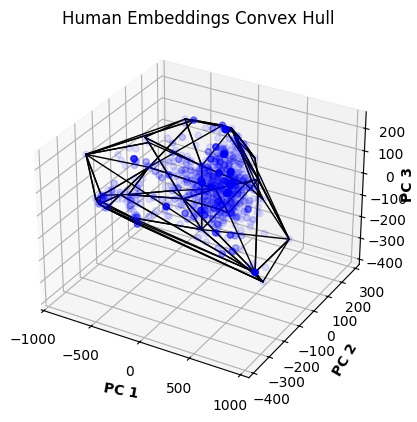

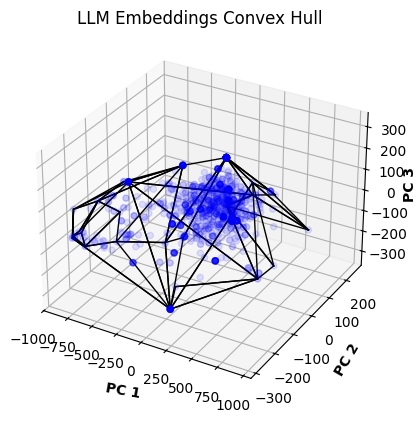

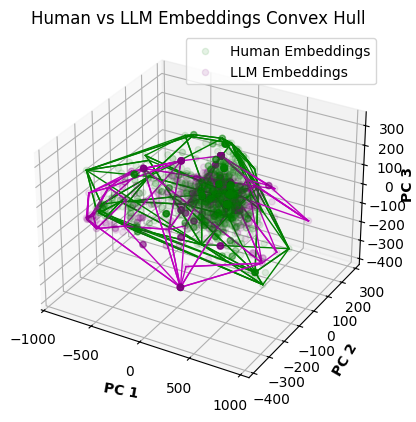

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 10)

# Visualizing the Convex Hull

# Visualization for 3D Reduced Embeddings
def plot_convex_hull(embeddings, hull, title="Convex Hull"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot points: [:,0] first PC, [:, 1] second PC, [:, 2] third PC
    ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], color="blue", alpha=0.1)

    # Plot convex hull
    for simplex in hull.simplices:
        ax.plot(embeddings[simplex, 0], embeddings[simplex, 1], embeddings[simplex, 2], "k-", linewidth = 1)

    # Add faces for visualization
    #ax.add_collection3d(Poly3DCollection(embeddings[hull.simplices], alpha=0.08, facecolor="grey", edgecolor = "black"))
    # Add axes labels
    ax.set_xlabel('PC 1', labelpad = 3, rotation= 350, fontweight = 'bold')
    ax.set_ylabel('PC 2', labelpad = 5, rotation = 60, fontweight = 'bold')
    ax.set_zlabel('PC 3', labelpad = -1, rotation = 90, fontweight = 'bold')
    plt.savefig('convex_hull' + title +'.png', dpi = 500, bbox_inches = 'tight')
    ax.set_title(title)
    plt.show()

# Visualize Human Embeddings
if human_metrics[0] > 0:
    plot_convex_hull(aggandred_word_embeddings_hum_visual, hull_hum, title="Human Embeddings Convex Hull")

# Visualize LLM Embeddings
if llm_metrics[0] > 0:
    plot_convex_hull(aggandred_word_embeddings_llm_visual, hull_llm, title="LLM Embeddings Convex Hull")

# Both Hulls in one Graph
# Function to plot two convex hulls in the same plot
def plot_two_convex_hulls(embeddings1, hull1, embeddings2, hull2, title="Convex Hull Comparison"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Plot points and convex hull for the first set (Human Embeddings)
    ax.scatter(embeddings1[:, 0], embeddings1[:, 1], embeddings1[:, 2], color="green", alpha=0.1, label="Human Embeddings")
    for simplex in hull1.simplices:
        ax.plot(embeddings1[simplex, 0], embeddings1[simplex, 1], embeddings1[simplex, 2], "g-", linewidth=1)
    #ax.add_collection3d(Poly3DCollection(embeddings1[hull1.simplices], alpha=0.08, facecolor="green", edgecolor = "black"))

    # Plot points and convex hull for the second set (LLM Embeddings)
    ax.scatter(embeddings2[:, 0], embeddings2[:, 1], embeddings2[:, 2], color="purple", alpha=0.1, label="LLM Embeddings")
    for simplex in hull2.simplices:
        ax.plot(embeddings2[simplex, 0], embeddings2[simplex, 1], embeddings2[simplex, 2], "m-", linewidth = 1)
    #ax.add_collection3d(Poly3DCollection(embeddings2[hull2.simplices], alpha=0.08, facecolor="purple", edgecolor = "black"))

    # Add axes labels
    ax.set_xlabel('PC 1', labelpad = 3, rotation= 350, fontweight = 'bold')
    ax.set_ylabel('PC 2', labelpad = 5, rotation = 60, fontweight = 'bold')
    ax.set_zlabel('PC 3', labelpad = -1, rotation = 90, fontweight = 'bold')

    # Add title and legend
    ax.set_title(title)
    ax.legend()
    plt.savefig('convex_hull_comparison.png', dpi = 500, bbox_inches = 'tight')
    plt.show()

# Call the function to plot both convex hulls
plot_two_convex_hulls(
    aggandred_word_embeddings_hum_visual, hull_hum,
    aggandred_word_embeddings_llm_visual, hull_llm,
    title="Human vs LLM Embeddings Convex Hull"
)

**Delaunay Triangulation**

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 5 and 6)

# Calculate the delaunay shape (tessellation)

# Function to calculate edge lengths and triangle areas
def calculate_delaunay_metrics(embeddings):
    thisdelaunay = Delaunay(embeddings)

    edge_lengths = []
    edge_set = set()

    # Loop over simplices (triangles)
    for simplex in thisdelaunay.simplices:
        # Get the vertices of the simplex
        points = embeddings[simplex]

        # Calculate pairwise distances (edge lengths) and track unique edges
        for i in range(3):
            for j in range(i + 1, 3):
                edge = tuple(sorted((simplex[i], simplex[j])))  # Sort vertices to ensure uniqueness
                if edge not in edge_set:
                    edge_set.add(edge)
                    edge_length = np.linalg.norm(points[i] - points[j])
                    edge_lengths.append(edge_length)

    return edge_lengths, len(edge_set), len(embeddings)

# Calculate metrics for human embeddings
hum_edge_lengths, hum_edge_count, hum_vertices = calculate_delaunay_metrics(aggandred_word_embeddings_hum)

# Calculate metrics for LLM embeddings
llm_edge_lengths, llm_edge_count, llm_vertices = calculate_delaunay_metrics(aggandred_word_embeddings_llm)

# Print summaries
print(f"Human Embeddings: Avg Edge Length = {np.mean(hum_edge_lengths):.2f}, Total Edges = {hum_edge_count}, Total Vertices = {hum_vertices}")
print(f"LLM Embeddings: Avg Edge Length = {np.mean(llm_edge_lengths):.2f}, Total Edges = {llm_edge_count}, Total Vertices = {llm_vertices}")


Human Embeddings: Avg Edge Length = 121.32, Total Edges = 7292, Total Vertices = 1352
LLM Embeddings: Avg Edge Length = 113.81, Total Edges = 5624, Total Vertices = 1210


# Statistical Tests

***Convex Hull***

*Volume and Area*

In [ ]:
# Bootstrapping each dataset individually to see how the CIs overlap
def bootstrap_this(data, func, n_resamples=1000):
    all_vol = [] # to store volume or edge length
    all_area = [] # to store area or amount of edges
    for _ in range(n_resamples):
        # Resample with replacement
        resample1 = data[np.random.choice(data.shape[0], size=data.shape[0], replace=True)]

        # Calculate convex hull volumes
        vol1 = func(resample1)[0]
        area1 = func(resample1)[1]

        if func == calculate_convex_hull:
            all_vol.append(vol1)
            all_area.append(area1)
        else:
            all_vol.extend(vol1)
            all_area.append(area1)

    # Comput confidence interval
    conf_int_vol = np.percentile(all_vol, [2.5, 97.5])
    conf_int_area = np.percentile(all_area, [2.5, 97.5])
    mean_vol = np.mean(all_vol)
    mean_area = np.mean(all_area)
    return mean_vol, conf_int_vol, mean_area, conf_int_area

# Perform bootstrap for hum and LLM
mean_vol_hum, conf_int_vol_hum, mean_area_hum, conf_int_area_hum = bootstrap_this(aggandred_word_embeddings_hum, calculate_convex_hull)
mean_vol_llm, conf_int_vol_llm, mean_area_llm, conf_int_area_llm = bootstrap_this(aggandred_word_embeddings_llm, calculate_convex_hull)
print("Human Data:")
print(f"Mean Volume: {mean_vol_hum:.2f}")
print(f"95% Confidence Interval Volume: {conf_int_vol_hum[0]:.2f} to {conf_int_vol_hum[1]:.2f}")
print(f"Mean Area: {mean_area_hum:.2f}")
print(f"95% Confidence Interval Area: {conf_int_area_hum[0]:.2f} to {conf_int_area_hum[1]:.2f}")
print("LLM Data:")
print(f"Mean Volume: {mean_vol_llm:.2f}")
print(f"95% Confidence Interval Volume: {conf_int_vol_llm[0]:.2f} to {conf_int_vol_llm[1]:.2f}")
print(f"Mean Area: {mean_area_llm:.2f}")
print(f"95% Confidence Interval Area: {conf_int_area_llm[0]:.2f} to {conf_int_area_llm[1]:.2f}")

Human Data:
Mean Volume: 34630278083.45
95% Confidence Interval Volume: 30498105376.84 to 38031845954.52
Mean Area: 685995426.36
95% Confidence Interval Area: 606477014.93 to 749083808.48
LLM Data:
Mean Volume: 29614649635.73
95% Confidence Interval Volume: 27670457994.27 to 31403313368.35
Mean Area: 601303795.91
95% Confidence Interval Area: 565097186.09 to 630571771.98


***Delaunay Triangulation***

In [ ]:
# Perform bootstrap for hum and LLM
mean_edge_hum, conf_int_edge_hum, mean_edge_count_hum, conf_int_edgecount_hum = bootstrap_this(aggandred_word_embeddings_hum, calculate_delaunay_metrics)
mean_edge_llm, conf_int_edge_llm, mean_edge_count_llm, conf_int_edgecount_llm = bootstrap_this(aggandred_word_embeddings_llm, calculate_delaunay_metrics)
print("Human Data:")
print(f"Mean Edge Length: {mean_edge_hum:.2f}")
print(f"95% Confidence Interval Volume: {conf_int_edge_hum[0]:.2f} to {conf_int_edge_hum[1]:.2f}")
print(f"Mean Total Edges: {mean_edge_count_hum:.2f}")
print(f"95% Confidence Interval Total Edges: {conf_int_edgecount_hum[0]:.2f} to {conf_int_edgecount_hum[1]:.2f}")
print("LLM Data:")
print(f"Mean Edge Length: {mean_edge_llm:.2f}")
print(f"95% Confidence Interval Edge Length: {conf_int_edge_llm[0]:.2f} to {conf_int_edge_llm[1]:.2f}")
print(f"Mean Total Edges: {mean_edge_count_llm:.2f}")
print(f"95% Confidence Interval Total Edges: {conf_int_edgecount_llm[0]:.2f} to {conf_int_edgecount_llm[1]:.2f}")

Human Data:
Mean Edge Length: 133.41
95% Confidence Interval Volume: 30.83 to 443.82
Mean Total Edges: 5052.52
95% Confidence Interval Total Edges: 4802.98 to 5301.05
LLM Data:
Mean Edge Length: 126.29
95% Confidence Interval Edge Length: 31.15 to 388.30
Mean Total Edges: 3902.99
95% Confidence Interval Total Edges: 3697.93 to 4106.07


*Visualization*

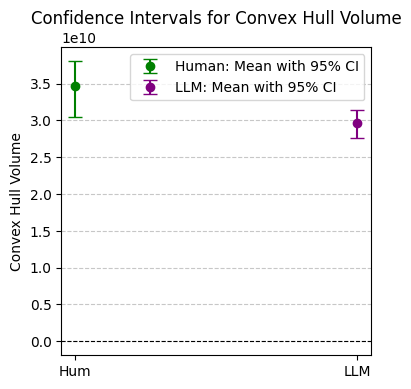

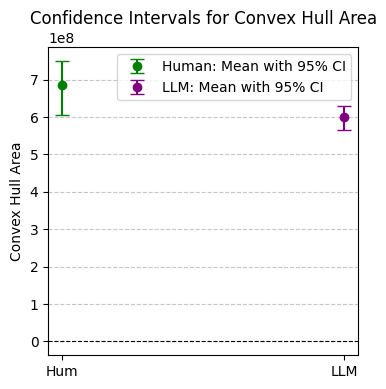

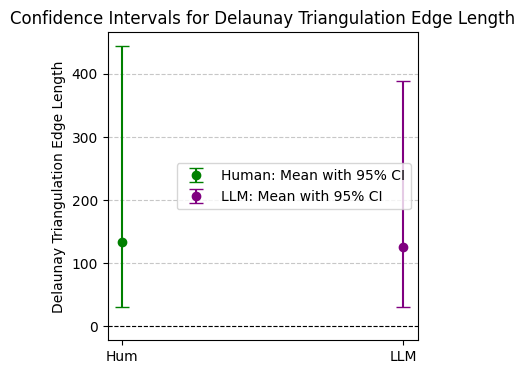

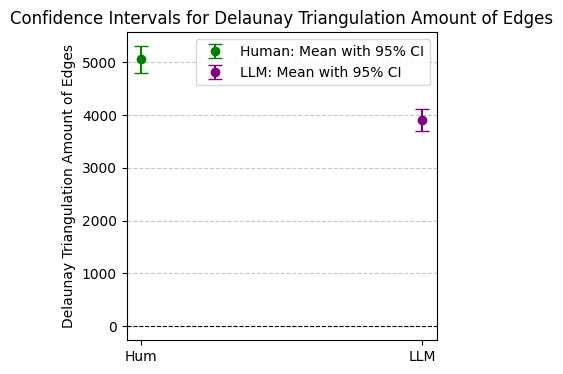

In [ ]:
# This was generated with the help of ChatGPT (Prompt Number 11 and 12)

# Calculate error bars (difference between mean and confidence interval bounds)
def plot_bootstrap_whole(mean1hum, conf_int1hum, mean1llm, conf_int1llm, labeled):
    errors_hum = [mean1hum - conf_int1hum[0], conf_int1hum[1] - mean1hum]
    errors_llm = [mean1llm - conf_int1llm[0], conf_int1llm[1] - mean1llm]

    # Data for plotting
    means = [mean1hum, mean1llm]
    errors = [errors_hum, errors_llm]

    # Create error bar plot
    plt.figure(figsize=(4, 4))
    x = ['Hum', 'LLM']

    # Plot error bars with green for Human and purple for LLM
    plt.errorbar(x[0], means[0], yerr=np.array(errors[0]).reshape(2, 1), fmt='o', capsize=5, color='green', label='Human: Mean with 95% CI')
    plt.errorbar(x[1], means[1], yerr=np.array(errors[1]).reshape(2, 1), fmt='o', capsize=5, color='purple', label='LLM: Mean with 95% CI')

    # Customize plot
    plt.ylabel(labeled)
    plt.title(f'Confidence Intervals for {labeled}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Optional baseline
    plt.legend()
    plt.savefig('CI_' + labeled +'.png', dpi = 500, bbox_inches = 'tight')
    plt.show()

# Plot Volume of Convex Hull
plot_bootstrap_whole(mean_vol_hum, conf_int_vol_hum, mean_vol_llm, conf_int_vol_llm, "Convex Hull Volume")
# Plot Area of Convec Hull
plot_bootstrap_whole(mean_area_hum, conf_int_area_hum, mean_area_llm, conf_int_area_llm, "Convex Hull Area")
# Plot Edge Length of Delaunay Triangulation
plot_bootstrap_whole(mean_edge_hum, conf_int_edge_hum, mean_edge_llm, conf_int_edge_llm, "Delaunay Triangulation Edge Length")
# Plot Triangle Area of Delaunay Triangulation
plot_bootstrap_whole(mean_edge_count_hum, conf_int_edgecount_hum, mean_edge_count_llm, conf_int_edgecount_llm, "Delaunay Triangulation Amount of Edges")